In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../data/supply_chain_data.csv')
df

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,haircare,SKU95,77.903927,65,672,7386.363944,Unknown,15,14,26,...,Mumbai,18,450,26,58.890686,Pending,1.210882,Air,Route A,778.864241
96,cosmetics,SKU96,24.423131,29,324,7698.424766,Non-binary,67,2,32,...,Mumbai,28,648,28,17.803756,Pending,3.872048,Road,Route A,188.742141
97,haircare,SKU97,3.526111,56,62,4370.916580,Male,46,19,4,...,Mumbai,10,535,13,65.765156,Fail,3.376238,Road,Route A,540.132423
98,skincare,SKU98,19.754605,43,913,8525.952560,Female,53,1,27,...,Chennai,28,581,9,5.604691,Pending,2.908122,Rail,Route A,882.198864


# Data Cleaning & Preparation

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product type             100 non-null    object 
 1   SKU                      100 non-null    object 
 2   Price                    100 non-null    float64
 3   Availability             100 non-null    int64  
 4   Number of products sold  100 non-null    int64  
 5   Revenue generated        100 non-null    float64
 6   Customer demographics    100 non-null    object 
 7   Stock levels             100 non-null    int64  
 8   Lead times               100 non-null    int64  
 9   Order quantities         100 non-null    int64  
 10  Shipping times           100 non-null    int64  
 11  Shipping carriers        100 non-null    object 
 12  Shipping costs           100 non-null    float64
 13  Supplier name            100 non-null    object 
 14  Location                 10

In [ ]:
df.describe()

,Price,Availability,Number of products sold,Revenue generated,Stock levels,Lead times,Order quantities,Shipping times,Shipping costs,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Defect rates,Costs
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000
mean,49.462461,48.400000,460.990000,5776.048187,47.770000,15.960000,49.220000,5.750000,5.548149,17.080000,567.840000,14.77000,47.266693,2.277158,529.245782
std,31.168193,30.743317,303.780074,2732.841744,31.369372,8.785801,26.784429,2.724283,2.651376,8.846251,263.046861,8.91243,28.982841,1.461366,258.301696
min,1.699976,1.000000,8.000000,1061.618523,0.000000,1.000000,1.000000,1.000000,1.013487,1.000000,104.000000,1.00000,1.085069,0.018608,103.916248
25%,19.597823,22.750000,184.250000,2812.847151,16.750000,8.000000,26.000000,3.750000,3.540248,10.000000,352.000000,7.00000,22.983299,1.009650,318.778455
50%,51.239831,43.500000,392.500000,6006.352023,47.500000,17.000000,52.000000,6.000000,5.320534,18.000000,568.500000,14.00000,45.905622,2.141863,520.430444
75%,77.198228,75.000000,704.250000,8253.976921,73.000000,24.000000,71.250000,8.000000,7.601695,25.000000,797.000000,23.00000,68.621026,3.563995,763.078231
max,99.171329,100.000000,996.000000,9866.465458,100.000000,30.000000,96.000000,10.000000,9.929816,30.000000,985.000000,30.00000,99.466109,4.939255,997.413450


In [5]:
df.isnull().sum()

Product type               0
SKU                        0
Price                      0
Availability               0
Number of products sold    0
Revenue generated          0
Customer demographics      0
Stock levels               0
Lead times                 0
Order quantities           0
Shipping times             0
Shipping carriers          0
Shipping costs             0
Supplier name              0
Location                   0
Lead time                  0
Production volumes         0
Manufacturing lead time    0
Manufacturing costs        0
Inspection results         0
Defect rates               0
Transportation modes       0
Routes                     0
Costs                      0
dtype: int64

In [6]:
# Removed duplicates SKU-date records
df = df.drop_duplicates(subset=['SKU'])
df

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,haircare,SKU95,77.903927,65,672,7386.363944,Unknown,15,14,26,...,Mumbai,18,450,26,58.890686,Pending,1.210882,Air,Route A,778.864241
96,cosmetics,SKU96,24.423131,29,324,7698.424766,Non-binary,67,2,32,...,Mumbai,28,648,28,17.803756,Pending,3.872048,Road,Route A,188.742141
97,haircare,SKU97,3.526111,56,62,4370.916580,Male,46,19,4,...,Mumbai,10,535,13,65.765156,Fail,3.376238,Road,Route A,540.132423
98,skincare,SKU98,19.754605,43,913,8525.952560,Female,53,1,27,...,Chennai,28,581,9,5.604691,Pending,2.908122,Rail,Route A,882.198864


In [7]:
df.columns.str.lower().str.strip()

Index(['product type', 'sku', 'price', 'availability',
       'number of products sold', 'revenue generated', 'customer demographics',
       'stock levels', 'lead times', 'order quantities', 'shipping times',
       'shipping carriers', 'shipping costs', 'supplier name', 'location',
       'lead time', 'production volumes', 'manufacturing lead time',
       'manufacturing costs', 'inspection results', 'defect rates',
       'transportation modes', 'routes', 'costs'],
      dtype='object')

In [8]:
# filled missing revenue generated with business accepted averges.
avg_revenue = df['Revenue generated'].mean()
df['Revenue generated'] = df['Revenue generated'].fillna(avg_revenue)

In [9]:
# Standardized product and location names.
def standardized_product(df):
    cols = ['Product type','Revenue generated']
    for col in cols:
        if col in df.columns:
            df[col] = df[col].str.strip().str.upper()

    print('Standardization complete.') 
    return df           

In [10]:
# Ensured numeric fields (sales, revenue, stock) were consistent
def ensure_numeric_field(df):
    cols = ['Price', 'Revenue generated','Shipping costs','Manufacturing costs','defeat rates','Costs']
    for col in cols:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors='coerce')
ensure_numeric_field(df)

In [11]:
df.shape

(100, 24)

In [12]:
df['Lead_time'] = pd.to_datetime(df['Lead time'], errors= 'coerce')

In [13]:
df['Manufacturing lead time'] = pd.to_datetime(df['Manufacturing lead time'], errors= 'coerce')

# Demand Trend Analysis

Analysis Performed

Compared sales volume across SKUs

Identified high-demand vs low-demand products

Analyzed sales trends by location

Checked consistency of demand over time

SKU
SKU51    9866.465458
SKU38    9692.318040
SKU31    9655.135103
SKU90    9592.633570
SKU2     9577.749626
SKU32    9571.550487
SKU67    9473.798033
SKU88    9444.742033
SKU52    9435.762609
SKU18    9364.673505
SKU99    9185.185829
SKU34    9061.710896
SKU24    9049.077861
SKU60    8864.084350
SKU23    8858.367571
SKU85    8684.613059
SKU0     8661.996792
SKU14    8653.570926
SKU80    8651.672683
SKU98    8525.952560
SKU7     8496.103813
SKU64    8458.730878
SKU66    8367.721618
SKU65    8354.579686
SKU29    8318.903195
SKU53    8232.334829
SKU71    8180.337085
SKU20    8128.027697
SKU49    8001.613207
SKU73    7910.886916
SKU79    7888.723268
SKU94    7888.356547
SKU6     7823.476560
SKU3     7766.836426
SKU96    7698.424766
SKU36    7573.402458
SKU8     7517.363211
SKU1     7460.900065
SKU48    7397.071005
SKU95    7386.363944
SKU44    7152.286049
SKU47    7089.474250
SKU21    7087.052696
SKU70    7014.887987
SKU61    6885.589351
SKU35    6541.329345
SKU16    6453.797968
SKU28    

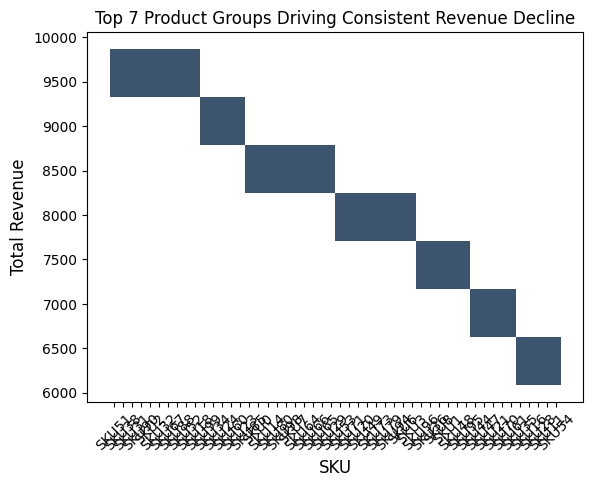

In [14]:
# Compared sales volume across SKUs
sku_demand = df.groupby('SKU')['Revenue generated'].sum().sort_values(ascending= False).head(50)
print(sku_demand)


plt.Figure(figsize=(12,6))
sns.histplot(x= sku_demand.index, y= sku_demand.values)
plt.title("Top 7 Product Groups Driving Consistent Revenue Decline")
plt.xlabel("SKU", fontsize= 12)
plt.ylabel('Total Revenue', fontsize= 12)
plt.xticks(rotation= 45)
plt.show()

High Demand SKU: ['SKU51', 'SKU38', 'SKU31', 'SKU90', 'SKU2', 'SKU32', 'SKU67', 'SKU88', 'SKU52', 'SKU18', 'SKU99', 'SKU34', 'SKU24', 'SKU60', 'SKU23', 'SKU85', 'SKU0', 'SKU14', 'SKU80', 'SKU98', 'SKU7', 'SKU64', 'SKU66', 'SKU65', 'SKU29', 'SKU53']
Low Demand SKU: ['SKU71', 'SKU20', 'SKU49', 'SKU73', 'SKU79', 'SKU94', 'SKU6', 'SKU3', 'SKU96', 'SKU36', 'SKU8', 'SKU1', 'SKU48', 'SKU95', 'SKU44', 'SKU47', 'SKU21', 'SKU70', 'SKU61', 'SKU35', 'SKU16', 'SKU28', 'SKU11', 'SKU54']


C:\Users\Hp\AppData\Local\Temp\ipykernel_5320\1279471035.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= sku_demand.index, y= sku_demand.values, palette= colors)


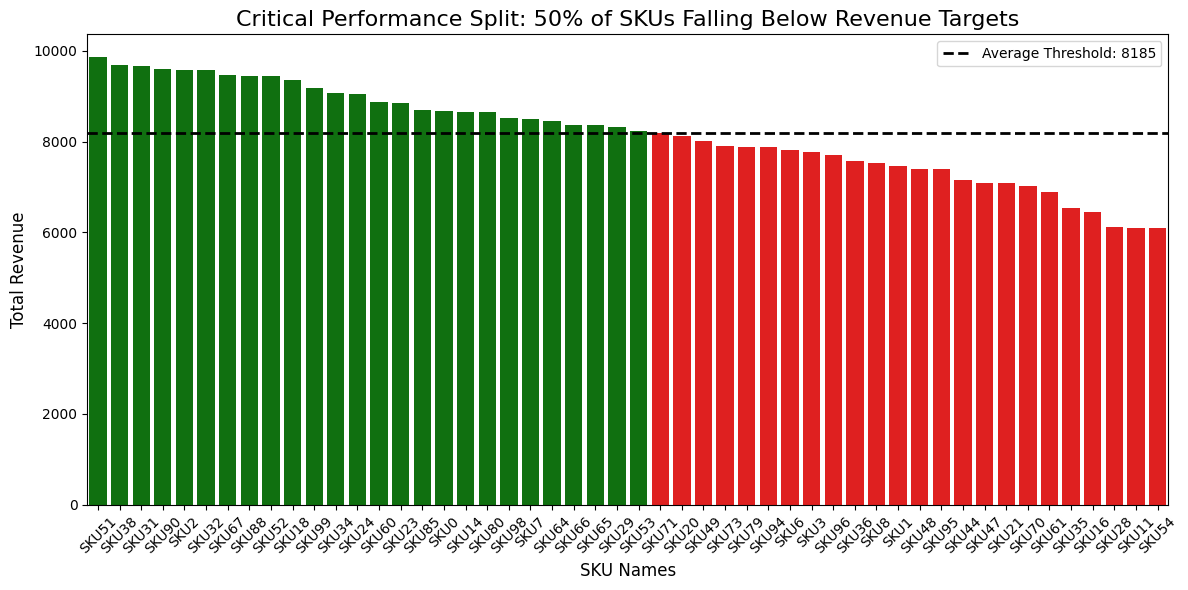

In [15]:
# identify high-demand vs low-demand products.
threshold = sku_demand.mean()

high_demand_sku = sku_demand[sku_demand >= threshold]
low_demand_sku = sku_demand[sku_demand < threshold]

print("High Demand SKU:",high_demand_sku.index.to_list())
print("Low Demand SKU:", low_demand_sku.index.to_list())

# define colour using if-else function
colors = ['green' if x >= threshold else 'red' for x in sku_demand]

# create bar plot
plt.figure(figsize=(12,6))

# use seaborn for the bar chart
sns.barplot(x= sku_demand.index, y= sku_demand.values, palette= colors)

# add a dashed line to show the average threshold
plt.axhline(threshold, color='black', linestyle='--', linewidth=2, label= f'Average Threshold: {threshold:.0f}')

plt.title('Critical Performance Split: 50% of SKUs Falling Below Revenue Targets', fontsize= 16)
plt.xlabel('SKU Names', fontsize= 12)
plt.ylabel('Total Revenue', fontsize= 12)
plt.legend()
plt.xticks(rotation= 45)
plt.tight_layout()
plt.show()


Location
Mumbai       137755.026877
Kolkata      137077.551005
Chennai      119142.815748
Bangalore    102601.723882
Delhi         81027.701225
Name: Revenue generated, dtype: float64


C:\Users\Hp\AppData\Local\Temp\ipykernel_5320\2830957819.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= location_revenue.index, y= location_revenue.values, palette='magma')


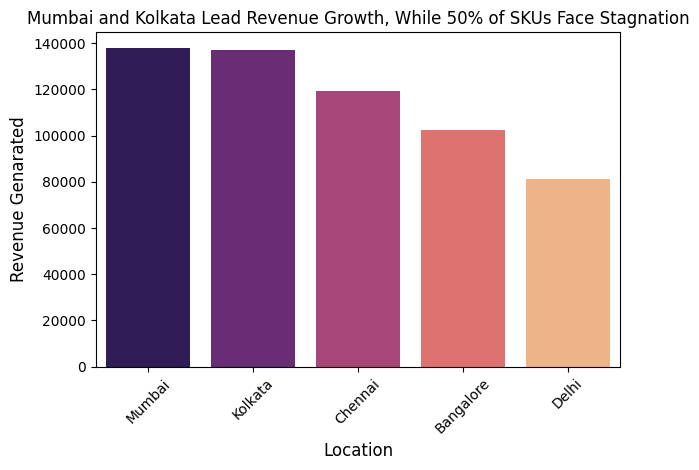

In [16]:
# analyzed sales trend by location
location_revenue = df.groupby('Location')['Revenue generated'].sum().sort_values(ascending= False)
print(location_revenue)

plt.Figure(figsize=(10,6))
sns.barplot(x= location_revenue.index, y= location_revenue.values, palette='magma')
plt.title('Mumbai and Kolkata Lead Revenue Growth, While 50% of SKUs Face Stagnation', fontsize= 12)
plt.xlabel('Location', fontsize= 12)
plt.ylabel('Revenue Genarated', fontsize= 12)
plt.xticks(rotation= 45)
plt.tight_layout()
plt.show()

                       Lead_time  Revenue generated
0  1970-01-01 00:00:00.000000001       24829.704075
1  1970-01-01 00:00:00.000000002       11730.555518
2  1970-01-01 00:00:00.000000003       15868.868759
3  1970-01-01 00:00:00.000000004       21076.044738
4  1970-01-01 00:00:00.000000005       12510.435214
5  1970-01-01 00:00:00.000000006        2943.381868
6  1970-01-01 00:00:00.000000007        9781.682484
7  1970-01-01 00:00:00.000000008       18244.306253
8  1970-01-01 00:00:00.000000009        9149.452092
9  1970-01-01 00:00:00.000000010       42890.618258
10 1970-01-01 00:00:00.000000011        9919.986094
11 1970-01-01 00:00:00.000000012       17466.106173
12 1970-01-01 00:00:00.000000013       25445.321576
13 1970-01-01 00:00:00.000000014       20151.152696
14 1970-01-01 00:00:00.000000016       16673.482881
15 1970-01-01 00:00:00.000000017        8458.730878
16 1970-01-01 00:00:00.000000018       49029.499630
17 1970-01-01 00:00:00.000000019        9261.829751
18 1970-01-0

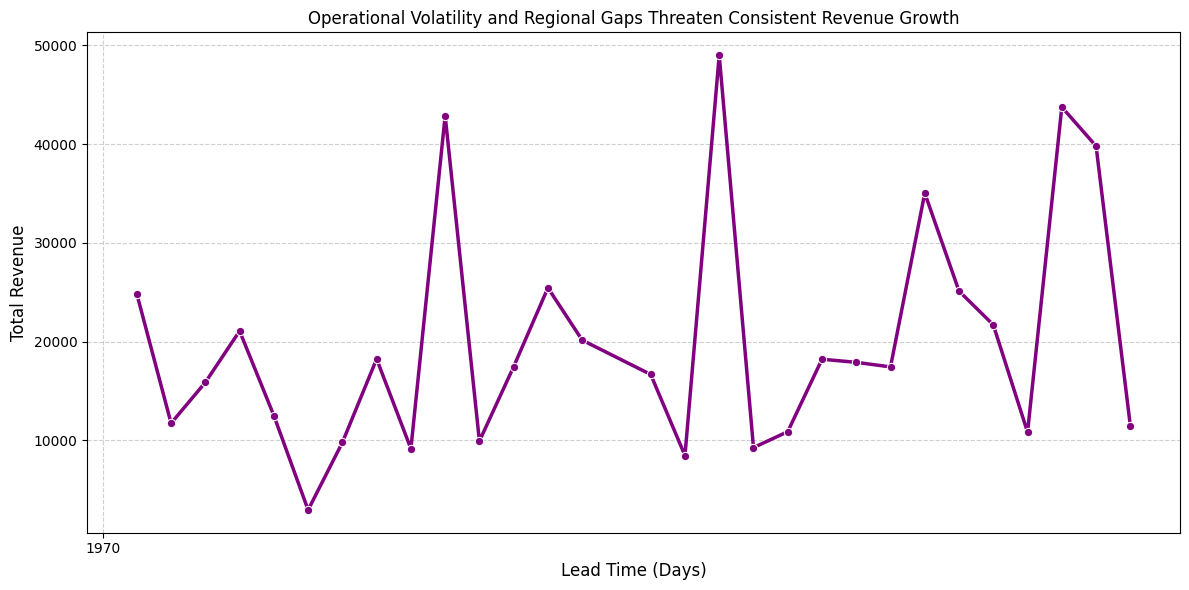

In [17]:
# check consistency for demand over time
time_trend = df.groupby('Lead_time')['Revenue generated'].sum().reset_index()
print(time_trend)

plt.figure(figsize=(12,6))
sns.lineplot(data= time_trend, x='Lead_time', y= 'Revenue generated', marker='o', color= 'purple', linewidth= 2.5)

plt.title('Operational Volatility and Regional Gaps Threaten Consistent Revenue Growth', fontsize= 12)
plt.xlabel('Lead Time (Days)', fontsize= 12)
plt.ylabel('Total Revenue', fontsize= 12)
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

# Customer Demand Segmentation

  Customer demographics  Revenue generated
0                Female      161514.489122
1                  Male      126634.394260
2            Non-binary      116365.801520
3               Unknown      173090.133837


C:\Users\Hp\AppData\Local\Temp\ipykernel_5320\119327343.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data= cust_demo_df, x= 'Customer demographics', y= 'Revenue generated', palette='viridis')


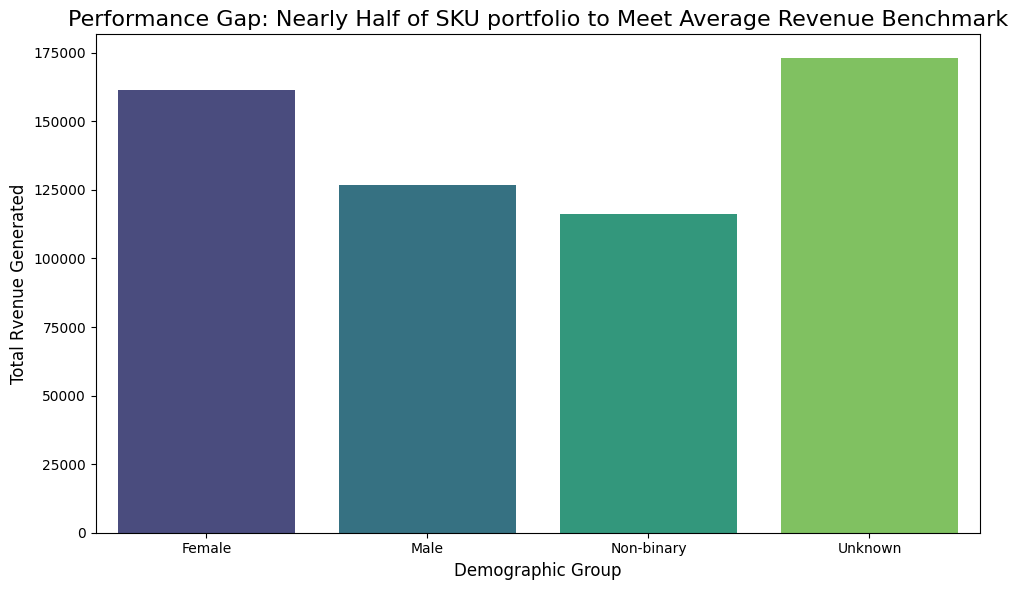

In [18]:
# calculated the customer demographics and revenue generated
cust_demo = df.groupby('Customer demographics')['Revenue generated'].sum().reset_index()
print(cust_demo)

# convert the proper dataframe using reset_index()
cust_demo_df = cust_demo.reset_index()

# create the chart
plt.figure(figsize=(10,6))

sns.barplot(data= cust_demo_df, x= 'Customer demographics', y= 'Revenue generated', palette='viridis')

# add label and title
plt.title('Performance Gap: Nearly Half of SKU portfolio to Meet Average Revenue Benchmark', fontsize= 16)
plt.xlabel('Demographic Group', fontsize=12)
plt.ylabel('Total Rvenue Generated', fontsize= 12)
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()

  Customer demographics    SKU  Revenue generated
0                Female   SKU1        7460.900065
1                Female  SKU11        6099.944116
2                Female  SKU16        6453.797968
3                Female  SKU17        2629.396435
4                Female  SKU28        6117.324615
5                Female  SKU29        8318.903195
6                Female  SKU35        6541.329345
7                Female  SKU36        7573.402458
8                Female  SKU37        2438.339930
9                Female  SKU39        1912.465663


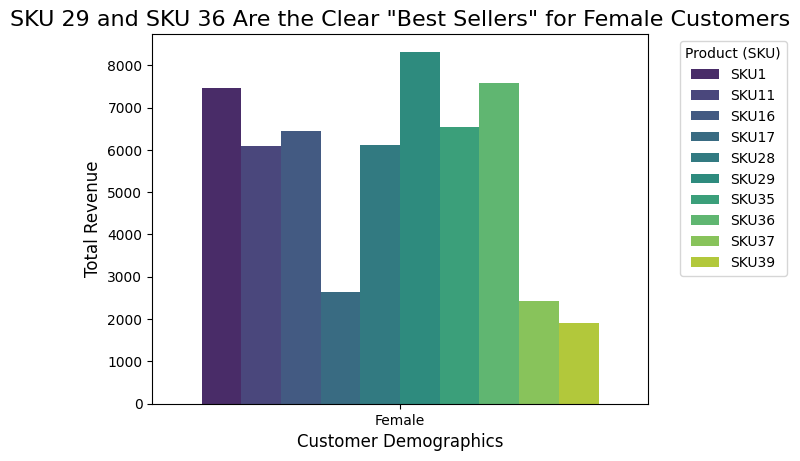

In [19]:
demo_sku = df.groupby(['Customer demographics','SKU'])['Revenue generated'].sum().reset_index().head(10)
print(demo_sku)

# create the chart
plt.Figure(figsize=(12,6))

# X = demographics
# y = revenue
# hue = sku
sns.barplot(data= demo_sku, x= 'Customer demographics', y= 'Revenue generated', hue='SKU',palette='viridis')

# add label and title
plt.title('SKU 29 and SKU 36 Are the Clear "Best Sellers" for Female Customers', fontsize= 16)
plt.xlabel('Customer Demographics', fontsize= 12)
plt.ylabel('Total Revenue', fontsize= 12)
plt.legend(title='Product (SKU)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

     Location Customer demographics  Revenue generated
0   Bangalore                Female       31984.736280
1   Bangalore                  Male       32013.151045
2   Bangalore            Non-binary       36192.081925
3   Bangalore               Unknown        2411.754632
4     Chennai                Female       25361.167313
5     Chennai                  Male       27967.825527
6     Chennai            Non-binary        9595.839301
7     Chennai               Unknown       56217.983607
8       Delhi                Female       41346.579416
9       Delhi                  Male       13093.216793
10      Delhi            Non-binary        4707.654962
11      Delhi               Unknown       21880.250054
12    Kolkata                Female       32862.333872
13    Kolkata                  Male       28208.649917
14    Kolkata            Non-binary       27653.394245
15    Kolkata               Unknown       48353.172971
16     Mumbai                Female       29959.672241
17     Mum

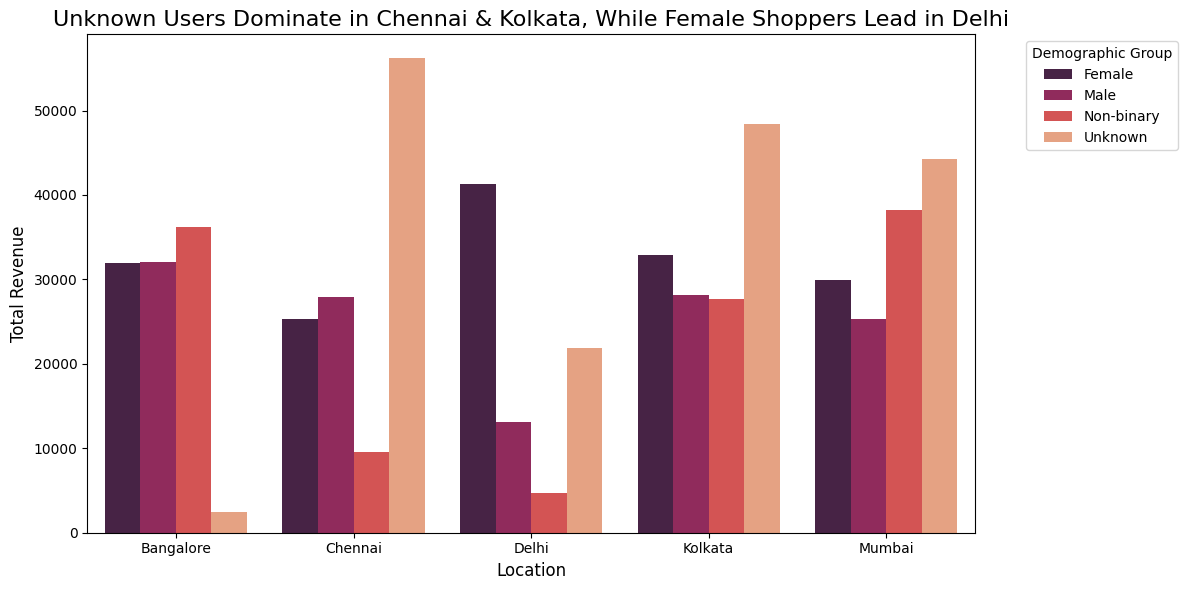

In [20]:
location_demo = (df.groupby(['Location','Customer demographics'])['Revenue generated'].sum().reset_index())
print(location_demo)

# create a graph 
plt.figure(figsize=(12,6))

# x = location
# y = revenue
# hue = Demographics
sns.barplot(data= location_demo, x='Location', y='Revenue generated', hue= 'Customer demographics', palette='rocket')

# add labels and title
plt.title('Unknown Users Dominate in Chennai & Kolkata, While Female Shoppers Lead in Delhi', fontsize= 16)
plt.xlabel('Location', fontsize= 12)
plt.ylabel('Total Revenue', fontsize= 12)
plt.legend(title= 'Demographic Group', bbox_to_anchor=(1.05, 1), loc= 'upper left')
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()

# Forecast Gap identification

Actual sales vs available stock

SKUs frequently under-forecasted

SKUs consistently over-forecasted

     SKU  forecast_gap
0   SKU0   8603.996792
1   SKU1   7407.900065
2  SKU10   2279.965802
3  SKU11   6053.944116
4  SKU12   2773.741446
5  SKU13   3972.738416
6  SKU14   8599.570926
7  SKU15   5433.086785
8  SKU16   6451.797968
9  SKU17   2584.396435


C:\Users\Hp\AppData\Local\Temp\ipykernel_5320\3796818015.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=gap_sorted, x='SKU', y='forecast_gap', palette=my_colors)


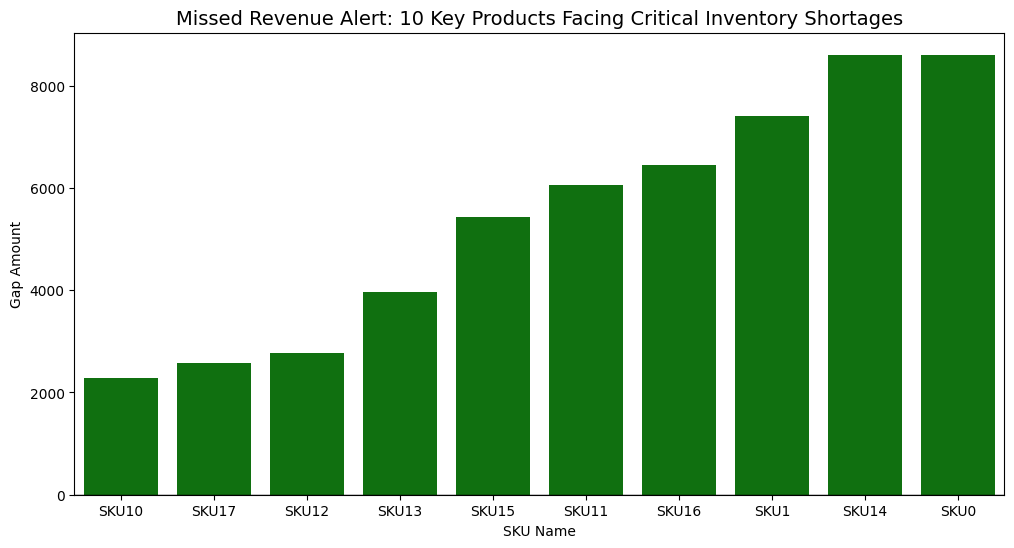

In [21]:
# Actual sales vs avaiable stock
df['forecast_gap'] = df['Revenue generated'] - df['Stock levels']

gap_summary = df.groupby('SKU')['forecast_gap'].mean().reset_index().head(10)

print(gap_summary)

# sort the data
gap_sorted = gap_summary.sort_values('forecast_gap')

# create simple color rule
# red = negative gap (overstock)
# green = positive gap(high demand/stock-out risk)
my_colors = ['red'if x < 0 else'green' for x in gap_sorted['forecast_gap']]

# create the graph
plt.figure(figsize=(12, 6))
sns.barplot(data=gap_sorted, x='SKU', y='forecast_gap', palette=my_colors)

# Add a black line at 0 to separate the two sides
plt.axhline(0, color='black', linewidth=1)

plt.title('Missed Revenue Alert: 10 Key Products Facing Critical Inventory Shortages', fontsize=14)
plt.ylabel('Gap Amount')
plt.xlabel('SKU Name')
plt.show()

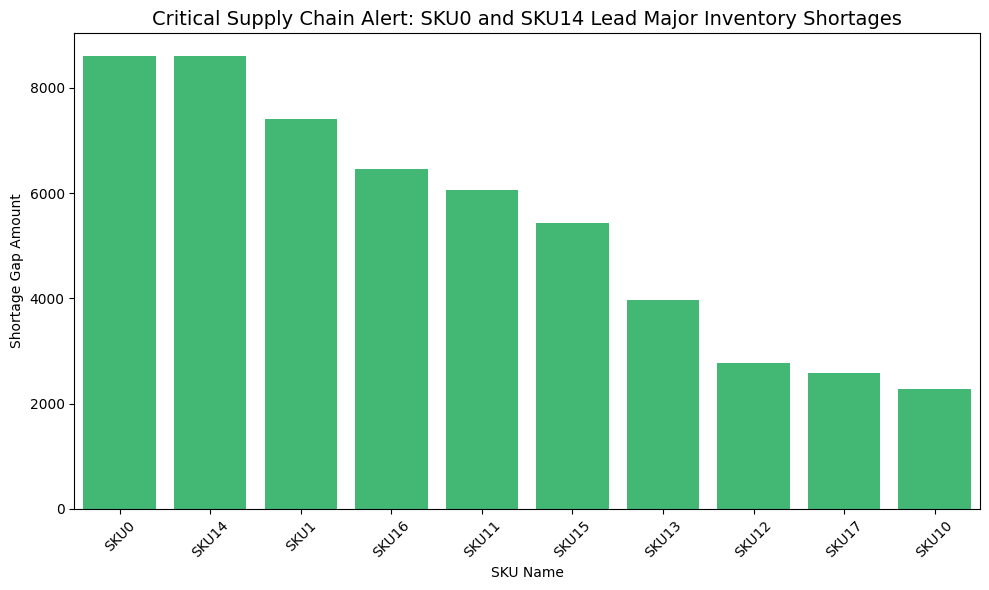

In [22]:
# identify under forecasted skus
under_forecasted = gap_summary[gap_summary['forecast_gap'] > 0].sort_values('forecast_gap',ascending= False)
under_forecasted

# 1. Setup the plot
plt.figure(figsize=(10, 6))

# 2. Create a simple bar chart
sns.barplot(data=under_forecasted, x='SKU', y='forecast_gap', color='#2ecc71')

# 3. Add Labels
plt.title('Critical Supply Chain Alert: SKU0 and SKU14 Lead Major Inventory Shortages', fontsize=14)
plt.xlabel('SKU Name')
plt.ylabel('Shortage Gap Amount')
plt.xticks(rotation=45) # Rotate labels so they are easy to read

plt.tight_layout()
plt.show()

In [23]:
# identify over forecasted skus
over_forcasted = gap_summary[gap_summary['forecast_gap'] < 0].sort_values('forecast_gap')
print(over_forcasted)

Empty DataFrame
Columns: [SKU, forecast_gap]
Index: []


In [24]:
df.to_csv("cleaned_supply_chain_data.csv", index=False)
